In [1]:
import pandas as pd
import matplotlib as mb
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns',100)
Data = pd.read_excel("Otw4_mgr.xlsx")

In [2]:
Labeleddata = Data.dropna()


In [3]:
Labeleddata_withr8index = Labeleddata.reset_index(drop=True)
test_row = Labeleddata_withr8index.iloc[5]
R8data= Labeleddata_withr8index.drop(5)
R8data = R8data.reset_index(drop=True)
#R8data data with H and H lab and without extracted row with index 50 in labeled data and index 5 with reset_index
TOC = R8data["TOC[%]"]
R8data = R8data.drop(columns=["H", "H (lab.)","TOC[%]"])
TOC_row5=test_row["TOC[%]"]

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
X_train, X_test, y_train, y_test = train_test_split(R8data,TOC)

linear_regression = ElasticNet()
linear_regression.fit(X=X_train, y=y_train)
prognoza = linear_regression.predict(X_test)
oczekiwane = y_test
while(metrics.r2_score(oczekiwane,prognoza)) < 0.95:
    X_train, X_test, y_train, y_test = train_test_split(R8data,TOC)
    prognoza = linear_regression.predict(X_test)
    oczekiwane = y_test
    linear_regression = ElasticNet()
    linear_regression.fit(X=X_train, y=y_train)
    for i,name in enumerate(R8data.columns):
        print(f'{name:>10}: {linear_regression.coef_[i]}')
    print("Linear regression b parameter ",linear_regression.intercept_)
    prognoza = linear_regression.predict(X_test)
    oczekiwane = y_test
    print(metrics.r2_score(oczekiwane,prognoza),metrics.mean_squared_error(oczekiwane,prognoza),)

      DCAL: 0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt: -0.0
  Vkerogen: 0.0
       VCL: -0.0
       PHI: 0.0
       CAL: 0.0
        DT: -0.0
       ILD: 0.0
       LL3: -0.058203725894284124
   GG_Corr: 0.01987847810722832
        GR: 0.0406130184884683
  GRS_Corr: -0.0087102251500132
  NPHICorr: 0.0
      POTA: -0.0
      THOR: 0.0
      URAN: 0.0
      RHOB: -0.0
Linear regression b parameter  -7.3565868695123
0.7286421012229767 4.762327773439244
      DCAL: -0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt: -0.0
  Vkerogen: 0.0
       VCL: -0.0
       PHI: 0.0
       CAL: -0.0
        DT: 0.0
       ILD: 0.06373637625849106
       LL3: -0.004077493375445609
   GG_Corr: 0.03950999156795837
        GR: 0.0
  GRS_Corr: 0.007787984335141781
  NPHICorr: 0.0
      POTA: -0.0
      THOR: -0.0
      URAN: -0.0
      RHOB: -0.0
Linear regression b parameter  -7.306310447529105
0.9232767359136436 0.3637264298979087
      DCAL: -0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt: 0.0
  Vker

C:\Users\mdzie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.042344232318715314, tolerance: 0.027923539583333334
  model = cd_fast.enet_coordinate_descent(


 1.7658948752117791
      DCAL: 0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt: -0.0
  Vkerogen: 0.0
       VCL: -0.0
       PHI: 0.0
       CAL: 0.0
        DT: -0.0
       ILD: 0.03239318393085801
       LL3: 0.0
   GG_Corr: 0.039191984332878446
        GR: -0.0
  GRS_Corr: 0.0
  NPHICorr: 0.0
      POTA: -0.0
      THOR: 0.0
      URAN: -0.0
      RHOB: -0.0
Linear regression b parameter  -6.0278870432359355
0.7884835890239115 3.4038025138896613
      DCAL: -0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt: -0.0
  Vkerogen: 0.0
       VCL: -0.0
       PHI: 0.0
       CAL: -0.0
        DT: 0.0
       ILD: 0.0766377152942936
       LL3: -0.02028058692143733
   GG_Corr: 0.02245338083915104
        GR: 0.022208321390016075
  GRS_Corr: 0.0001502852408388658
  NPHICorr: 0.0
      POTA: -0.0
      THOR: -0.0
      URAN: -0.0
      RHOB: -0.0
Linear regression b parameter  -6.736433081415923
-163.51621970046207 0.5110158132918056
      DCAL: -0.0
     Vsand: -0.0
     Vlime: 0.0
    Vpiryt:

0.96269037714144 0.33777820260748215


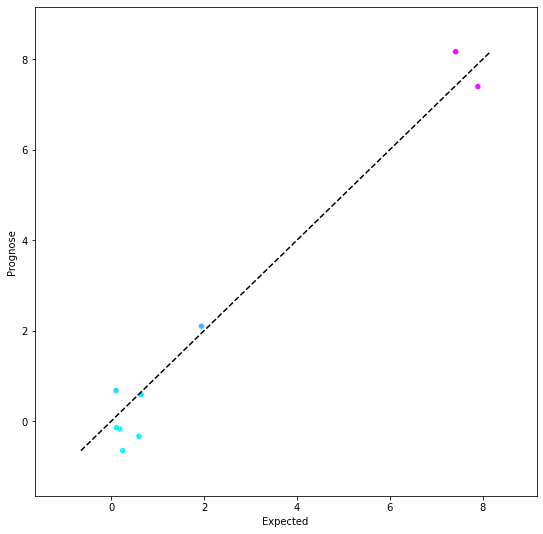

In [5]:
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(x=oczekiwane,y = prognoza,hue = prognoza,palette="cool",legend = False)
axes.set(xlabel='Expected', ylabel='Prognose')
start = min(oczekiwane.min(),prognoza.min())
end = max(oczekiwane.max(),prognoza.max())
axes.set_xlim(start-1,end+1)
axes.set_ylim(start-1,end+1)
line = plt.plot([start,end],[start,end],"k--")
print(metrics.r2_score(oczekiwane,prognoza),metrics.mean_squared_error(oczekiwane,prognoza))

In [6]:
model_data = Data.drop(columns=["H", "H (lab.)","TOC[%]"])
linear_regression.predict(model_data.iloc[50].values.reshape(1,-1))
#here ElasticNet value should be 2.05

array([-0.08642737])